# **Using machine learning algorithms to predict the severity of traffic accidents in London**

## Introduction

Road traffic accidents have a significant impact on the mortality rates of both developing and developed countries around the world. The World Health Organization points out that road traffic accidents are the main cause of death among young people (aged 5-29) (World Health Organization, 2023). About 1.19 million people die in road traffic accidents every year, which is equivalent to 3300 people dying every day due to traffic accidents. Moreover, the number of deaths from road traffic accidents is continuously increasing. By 2030, road traffic injuries will become the seventh leading cause of death globally (Ahmed, S. K et al., 2023). Although overall, the number of traffic accident fatalities in the UK has been decreasing since 1979, in recent years, particularly between 2021 and 2022, the reported number of road injuries in the UK has increased (Department for Transport, 2023). Studies have shown that the locations of road accidents are not random, and they are often highly concentrated in urban areas (Curiel, Ram í rez and Bishop, 2018). As the largest city in the UK, London faces busy traffic every day, which is the best research target. Therefore, we will predict the severity of road traffic accidents in London. These studies may help hospitals and traffic police departments optimize the deployment of emergency resources such as medical rescue and police.

## Literature review

At present, there are already some studies on predicting road traffic accidents. Choosing which variables is a prerequisite for predicting the severity of traffic accidents, as these are inputs to the traffic accident severity prediction model. Yu et al. (2021) proposed a deep spatial-temporal graph convolutional network (DSTGCN) aimed at predicting the risk of future traffic accidents on specific road sections. They collect data related to traffic accidents, including weather conditions, traffic flow, road structure, and traffic accident records. And use it as input for the neural network model to explore spatial correlation and temporal dependence. For example, adverse weather conditions such as rain and snow can have a negative impact on the severity of traffic accidents (El Basyoung, 2014). Accidents that occur during the day cause less harm than those that occur at night, as reduced visibility can affect the driver's reaction speed, leading to accidents and even fatalities (Behnood and Al Badairi, 2020). Similarly, Liu et al. (2019) determined that lighting conditions are one of the important factors affecting the severity of nighttime traffic accidents in China. These factors all provide ideas for this study.

In terms of research methods, decision tree is a machine learning model based on tree structure for decision-making, which recursively divides data into different categories (Quinlan, 1986). Moral Garc í a et al. (2019) proposed a method called Information Root Node Variation (IRNV) based on decision trees to predict the severity of accidents for novice drivers in urban areas. Kononen et al. (2011) developed a multivariate logistic regression model to predict the probability of a vehicle involved in a collision containing one or more serious or disabled occupants. Random Forest (RF) has also been proven to be useful for predicting the severity of traffic accidents (Mallahi et al., 2022). They compared the prediction accuracy of RF, Support Vector Machine (SVM), and Artificial Neural Network (ANN) and found that RF performs better in classifying and predicting the severity of traffic accidents. These studies indicate the possibility of using machine learning models to predict the severity of accidents based on data related to traffic accidents. But when using machine learning for prediction, multiple different models should be used to determine the most suitable method for this study by comparing their accuracy.

## Research question

Performance of Different Machine Learning Algorithms in Predicting the Severity of London Traffic Accidents

## Data Preprocessing

All the data used in this study were sourced from the UK Department of Transport (2023), an official website of a government agency with strong reliability in its data sources. This dataset records the severity, road conditions, and relevant environmental information of each traffic accident in the UK from 2018 to 2023. In this study, we will only select accidents within the London area for analysis.

Firstly, read our dataset, remove rows with empty values, and select the London borough (starting with E09).

In [41]:
## import packages
import pandas as pd
import numpy as np
from IPython.display import Image
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import rfpimp
from sklearn.tree import DecisionTreeClassifier

In [2]:
## Read in the road safety data:
acc = pd.read_csv("dft-road-casualty-statistics-collision-last-5-years.csv")

# Delete rows containing NA values
acc.dropna(inplace=True)

# Filter out data starting with 'E09' in the ‘lsoa_of_casualty' column
acc = acc[acc['local_authority_highway'].str.contains('E09', na=False)]

# Display 5 rows of data
print("There are", acc.shape[0],"x", acc.shape[1], "data in the dataset" )
print(acc.head())

C:\Users\13908\AppData\Local\Temp\ipykernel_21216\937632192.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  acc = pd.read_csv("dft-road-casualty-statistics-collision-last-5-years.csv")


There are 118523 x 36 data in the dataset
  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2018010080971           2018           10080971               529150.0   
1  2018010080973           2018           10080973               542020.0   
2  2018010080974           2018           10080974               531720.0   
3  2018010080981           2018           10080981               541450.0   
4  2018010080982           2018           10080982               543580.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                182270.0  -0.139737  51.524587             1   
1                184290.0   0.046471  51.539651             1   
2                182910.0  -0.102474  51.529746             1   
3                183220.0   0.037828  51.530179             1   
4                176500.0   0.065781  51.469258             1   

   accident_severity  number_of_vehicles  ...  \
0                  3                   2  ...   
1     

Next, we will select dependent and independent variables related to the study, and remove irrelevant variables such as longitude and latitude.

In [3]:
selected_columns = [
    'accident_severity',
    'number_of_vehicles',
    'number_of_casualties',
    'road_type',
    'speed_limit',
    'road_surface_conditions',
    'special_conditions_at_site',
    'urban_or_rural_area',
    'trunk_road_flag',
    'light_conditions',
    'weather_conditions',
    'time',
    'date'
]

acc = acc[selected_columns]
acc.head()

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,trunk_road_flag,light_conditions,weather_conditions,time,date
0,3,2,2,3,30,1,0,1,2,4,1,01:30,01/01/2018
1,3,1,1,6,30,1,0,1,2,4,1,00:50,01/01/2018
2,3,2,1,6,20,1,0,1,2,4,1,00:45,01/01/2018
3,2,2,1,3,30,2,0,1,2,4,2,03:00,01/01/2018
4,2,2,2,6,30,2,0,1,2,4,1,02:20,01/01/2018


As can be seen, except for time and date, all variables are already numerical variables. For time, when analyzing traffic accidents, it is common to focus on the time period during which the accident occurred. Hourly units may be more suitable for data granularity and sufficient to provide sufficient accuracy. Using minutes as a unit will increase the burden of model training and reduce prediction efficiency. For dates, focusing only on the month is more likely to improve the accuracy of the model. Because the severity of traffic accidents is not directly related to the year and day, while the month is related to the season, such as the possibility of more blizzard weather in winter. Therefore, we made modifications to these two variables.

In [4]:
acc['hour'] = acc['time'].str.split(':').str[0].astype(int).astype(str)
acc['month'] = acc['date'].apply(lambda x: x.split('/')[1]).astype(int).astype(str)

In [5]:
acc.drop(columns=['time'], inplace=True)
acc.drop(columns=['date'], inplace=True)
acc['hour'] = acc['hour'].astype(int)
acc['month'] = acc['month'].astype(int)
acc.head()

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,trunk_road_flag,light_conditions,weather_conditions,hour,month
0,3,2,2,3,30,1,0,1,2,4,1,1,1
1,3,1,1,6,30,1,0,1,2,4,1,0,1
2,3,2,1,6,20,1,0,1,2,4,1,0,1
3,2,2,1,3,30,2,0,1,2,4,2,3,1
4,2,2,2,6,30,2,0,1,2,4,1,2,1


Although the variables that need to be studied have been identified, some outliers still need to be removed, such as -1 in the light_conditions variable indicating - Data missing or out of range.

In [35]:
# Delete rows with road_type column values of 9 and -1
acc = acc[(acc['road_type'] != 9) & (acc['road_type'] != -1)]

# Delete rows with values of 99 and -1 in the speed_limit column
acc = acc[(acc['speed_limit'] != 99) & (acc['speed_limit'] != -1)]

# Delete rows with road_surface_conditions column values of 9 and -1
acc = acc[(acc['road_surface_conditions'] != 9) & (acc['road_surface_conditions'] != -1)]

# Delete rows with special_conditions_at_site column values of 9 and -1
acc = acc[(acc['special_conditions_at_site'] != 9) & (acc['special_conditions_at_site'] != -1)]

# Delete rows with urban_or_rural_area column values of -1
acc = acc[(acc['urban_or_rural_area'] != -1)]

# Delete rows with trunk_road_flag column values of -1
acc = acc[(acc['trunk_road_flag'] != -1)]

# Delete rows with light_conditions column values of -1
acc = acc[(acc['light_conditions'] != -1)]

# Delete rows with weather_conditions column values of -1
acc = acc[(acc['weather_conditions'] != -1)]

print("There are", acc.shape[0],"x", acc.shape[1], "data in the dataset" )

acc.describe()

There are 104259 x 13 data in the dataset


,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,trunk_road_flag,light_conditions,weather_conditions,hour,month
count,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000,104259.000000
mean,2.832743,1.830115,1.181327,4.891491,27.817359,1.223453,0.086247,1.033100,1.992221,2.030559,1.592515,13.852521,6.690578
std,0.385669,0.652239,0.561075,1.754186,7.692685,0.455350,0.588260,0.178899,0.087854,1.577178,1.726322,5.456363,3.382191
min,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,3.000000,20.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,10.000000,4.000000
50%,3.000000,2.000000,1.000000,6.000000,30.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,15.000000,7.000000
75%,3.000000,2.000000,1.000000,6.000000,30.000000,1.000000,0.000000,1.000000,2.000000,4.000000,1.000000,18.000000,10.000000
max,3.000000,13.000000,16.000000,7.000000,70.000000,5.000000,7.000000,2.000000,2.000000,7.000000,9.000000,23.000000,12.000000


Finally, summarize and describe the processed data.

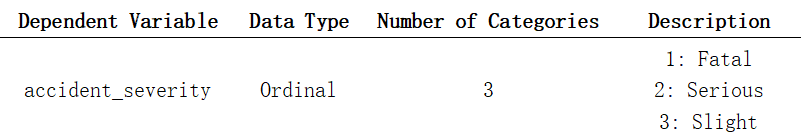

In [7]:
Image(filename='dependent variable.jpg')

There is only one dependent variable, which is accident_severity, used to describe the severity of accidents. 1- accidents with fatalities, 2- accidents with severe injuries, and 3- accidents with no injuries or minor injuries.

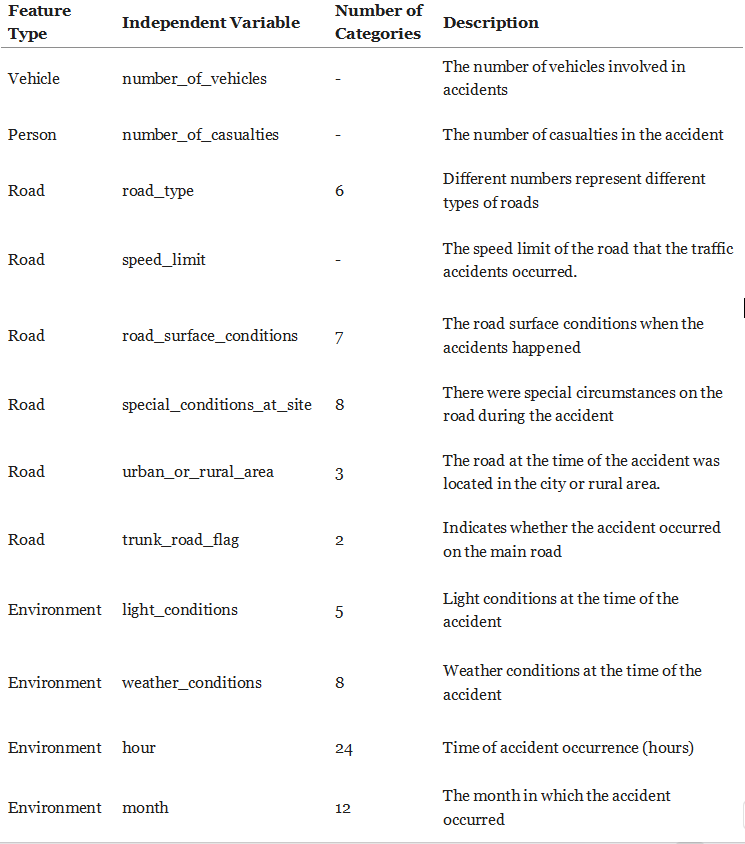

In [8]:
Image(filename='independent variable.png')

There are a total of 12 independent variables.

The six numbers in road_type represent: 1-Roundabout; 2-One way street; 3-Dual Carriageway; 6-Single carriage; 7-Slip road; 12-One way street/Slip road.

The seven numbers in road_surface_conditions represent: 1-Dry; 2-Wet or dump; 3-Snow; 4-Frost or ice; 5-Flood over 3cm Deep; 6-Oil or diesel; 7-Mud.

The eight numbers in specific_conditions.at_site represent: 0-None; 1-Auto traffic signal - out; 2-Auto signal part defective; 3-Road sign or marking defective or observed; 4-Roadworks; 5-Road surface defective; 6-Oil or diesel; 7-Mud.

The three numbers in urban_or_rural-area represent: 1-Urban; 2-Rural; 3-Unallocated.

The two numbers in trunk_road_flag represent: 1-Trunk (Roads managed by Highways England); 2-Non trunk.

The five numbers in light_conditions represent: 1-Daylight; 4-Darkness - lights lit; 5-Darkness - lights unlit; 6-Darkness - no lighting; 7-Darkness - lighting unknown.

The eight numbers in weather_conditions represent: 1-Fine no high winds; 2-Raining no high winds; 3-Snowing no high winds; 4-Fine+high winds; 5-Rain+high winds; 6-Snowing+high winds; 7-Fog or miss; 8-Other.

Now, the dataset contains 118523 traffic accidents and corresponding 1 dependent variable and 12 independent variables.

## Methodology

Due to the need to predict the severity of road traffic accidents and the fact that we have already labeled the severity of accidents, machine learning classification algorithms are most suitable for this study. Firstly, we perform cross validation before establishing the model and validating the model parameters in machine learning, dividing the training and testing sets. Next, adjust the hyperparameters of the model and establish prediction models using the random forest algorithm and the classification and regression tree (CART) algorithm respectively. Finally, analyze the predicted results.

### Cross Validation

Cross validation is a commonly used method in machine learning to establish models and validate model parameters. Cross validation, as the name suggests, is the repeated use of data, dividing the obtained sample data into different training and testing sets, using the training set to train the model, and using the testing set to evaluate the quality of the model's predictions. On this basis, multiple sets of different training and testing sets can be obtained, and a certain sample in one training set may become a sample in the next test set, which is called "cross".

In [36]:
#Split the data into training and testing subsets 
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(acc.drop(['accident_severity'], axis = 1), acc.accident_severity,
                                                    random_state=random_state_split)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(78194, 12)
(78194,)
(26065, 12)
(26065,)


### Random Forest

A random forest is a forest established in a random way, with many decision trees inside, and each decision tree in a random forest is not related to each other. After obtaining the forest, when a new input sample enters, let each decision tree in the forest make a judgment to see which class the sample should belong to (for classification algorithms), and then see which class is selected the most to predict which class the sample belongs to.

In [37]:
# Define the hyperparameters for tuning
rf_param_grid = {
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2, 4, 6, 8]
}

# Define Random Forest model
model_rf = RandomForestClassifier()

# Perform hyperparameter tuning using gridsearch
rf_grid_search = GridSearchCV(model_rf, rf_param_grid)
rf_grid_search.fit(train_x,train_y)
print('Best hyperparameters:', rf_grid_search.best_params_)
print('Best score:', rf_grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 8}
Best score: 0.8375322920281025


In [47]:
#Train the Random Forest model
random_forest = RandomForestClassifier(max_depth=rf_grid_search.best_params_['max_depth'], min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                       random_state=10000)
random_forest.fit(train_x,train_y)

#Evaluate prediction accuracy of the random forest model based on precision, recall, and F1-score
predict_y = random_forest.predict(test_x)
print(classification_report(digits=6,y_true=test_y,y_pred=predict_y))

              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       128
           2   0.000000  0.000000  0.000000      4113
           3   0.837291  1.000000  0.911441     21824

    accuracy                       0.837291     26065
   macro avg   0.279097  0.333333  0.303814     26065
weighted avg   0.701057  0.837291  0.763142     26065



d:\python3.9.0\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python3.9.0\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python3.9.0\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            Importance
Feature                               
number_of_vehicles                 0.0
number_of_casualties               0.0
road_type                          0.0
speed_limit                        0.0
road_surface_conditions            0.0
special_conditions_at_site         0.0
urban_or_rural_area                0.0
trunk_road_flag                    0.0
light_conditions                   0.0
weather_conditions                 0.0
hour                               0.0
month                              0.0


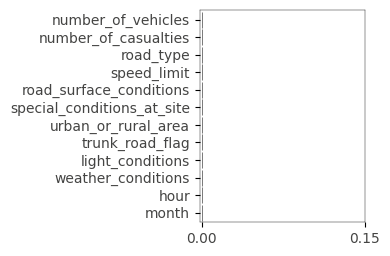

In [39]:
imp_rf = rfpimp.importances(random_forest, test_x, test_y)
print(imp_rf)

vi = rfpimp.plot_importances(imp_rf)
vi.view()

### CART

CART is a type of decision tree that simplifies the size of the decision tree and improves the efficiency of generating decision trees compared to ID3 and C4.5 algorithms. The generation of CART decision trees can be divided into two scenarios: classification trees and regression trees. In this study, classification trees will be used for prediction.

In [51]:
# Default settings
cart_default = DecisionTreeClassifier(random_state=0)
cart_default.fit(train_x, train_y)
# Print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

# Define the hyperparameters for tuning
dt_param_grid = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}
model_dt = DecisionTreeClassifier(random_state=10000)
dt_grid_search = GridSearchCV(model_dt, dt_param_grid)
dt_grid_search.fit(train_x, train_y)

# Perform hyperparameter tuning using gridsearch
print ("The best parameter value is: ")
print (dt_grid_search.best_params_)
print ("The best score is: ")
print (dt_grid_search.best_score_) 

Tree depth: 39
The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 2}
The best score is: 
0.8339003086333505


In [52]:
# Train the CART model
CART = DecisionTreeClassifier(max_depth=dt_grid_search.best_params_['max_depth'], min_samples_split=dt_grid_search.best_params_['min_samples_split'], random_state=10000)
CART.fit(train_x, train_y)

#Evaluate prediction accuracy of the CART model based on precision, recall, and F1-score
predict_y = CART.predict(test_x)
print(classification_report(digits=6,y_true=test_y,y_pred=predict_y))

              precision    recall  f1-score   support

           1   0.071429  0.007812  0.014085       128
           2   0.160221  0.007051  0.013507      4113
           3   0.837495  0.992760  0.908542     21824

    accuracy                       0.832381     26065
   macro avg   0.356382  0.335875  0.312045     26065
weighted avg   0.726861  0.832381  0.762915     26065



                            Importance
Feature                               
light_conditions                0.0038
hour                            0.0028
urban_or_rural_area             0.0018
road_type                       0.0010
number_of_casualties            0.0008
road_surface_conditions         0.0008
speed_limit                     0.0002
special_conditions_at_site      0.0002
trunk_road_flag                 0.0000
weather_conditions             -0.0004
month                          -0.0014
number_of_vehicles             -0.0020


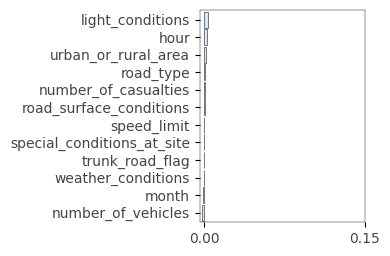

In [45]:
imp_dt = rfpimp.importances(CART, test_x, test_y)
print(imp_dt)

vi = rfpimp.plot_importances(imp_dt)
vi.view()

The following indicators appear in the model prediction results, which are compared between the predicted results and the actual results when evaluating classifier performance.

Precision: The proportion of correctly predicted positives to all predicted positives.

Recall: The proportion of correctly predicted positives to all actual positives.

F1 score: The harmonic mean of precision and recall.

Support: The number of samples in each category or the total number of samples in the test set.

Accuracy: The accuracy of model predictions.

Macro avg: The average value of all label results.

Weighted avg: The weighted average of all label results.

Among them, precision, recall, and f1 score are commonly used indicators to evaluate the performance of classifiers.

## Result and discussion

The prediction accuracy of the random forest model (83.73%) is slightly higher than that of the CART model (83.24%), indicating that overall, the prediction performance of the random forest model is better than that of the CART model.

The random forest model has performed quite well in predicting minor traffic accidents, with an accuracy rate of about 83.73% and a corresponding recall rate of about 100%, indicating that the model has not made any misclassifications in predicting minor traffic accidents. However, the model performs poorly in predicting fatal and serious traffic accidents. Its accuracy and corresponding recall rate are both about 0%. From the F1 score, it can also be seen that the accuracy of the random forest model in predicting minor traffic accidents is far greater than that of fatal and serious traffic accidents. Therefore, random forest models are unable to predict fatal and severe levels of traffic accidents. From the relevant feature importance results, it can be seen that the random forest model believes that these features are not closely related to the severity of traffic accidents.

Although the prediction accuracy of the CART model is slightly lower than that of the random forest model, it has shown some effectiveness in predicting fatal and serious traffic accidents. Although the accuracy in predicting fatal traffic accidents is only about 7.14%, and the accuracy in predicting serious traffic accidents is only about 16.02%, compared to the random forest model, it to some extent compensates for the shortcomings in predicting fatal and serious traffic accidents. Meanwhile, the prediction accuracy of the CART model in minor accidents is 83.75%, with a recall rate of approximately 99.28%. This indicates that, similar to the random forest model, most minor accidents are classified correctly. However, in this situation, the random forest model cannot predict serious and fatal traffic accidents. Another difference from the random forest model is that the CART model believes that the three characteristics of lighting conditions, time, and whether the road is located in the city are related to the severity of traffic accidents.

## Limitations

The accuracy of the random forest model in predicting traffic accidents is generally slightly higher than that of the CART model. Meanwhile, due to the failure of random forests to accurately predict any serious accidents, the CART model performs better in predicting fatalities and severity level accidents. However, both models have low accuracy in predicting fatal and severe levels of traffic accidents, although the CART model is relatively better in this regard. This may be related to the fact that most of the data in the dataset is composed of minor traffic accidents, and there is not enough fatal and severe data for the model to learn.

On the other hand, it can be observed from the importance of the selected features in predicting the severity of traffic accidents that both the random forest model and the CART model have lower importance values, indicating that they may not be sufficient to accurately predict the severity of London night traffic accidents. Therefore, it is necessary to supplement or replace the selected features. For example, most of the features in this study focus on roads and the environment. Adding some driver and vehicle characteristics, such as the driver's age, gender, and brand of the accident vehicle, may be helpful.

## Conclusion

In summary, machine learning has shown good performance in predicting the severity of London road traffic accidents, especially in predicting minor traffic accidents. However, neither of these models can predict fatal and severe traffic accidents. Meanwhile, this study also revealed several characteristics that may be related to the severity of traffic accidents. Future work can focus on improving the accuracy of fatal and serious traffic accidents to help emergency service departments allocate medical and police resources reasonably.

## References

Ahmed, S. K., Mohammed, M. G., Abdulqadir, S. O., El‐Kader, R. G. A., El‐Shall, N. A., Chandran, D., Rehman, M. E. U. and Dhama, K. (2023). *Road traffic accidental injuries and deaths: A neglected global health issue*. Health Science Reports, 6(5), e1240-n/a. https://doi.org/10.1002/hsr2.1240

Behnood, A. and Al-Bdairi, N. S. S. (2020). *Determinant of injury severities in large truck crashes: A weekly instability analysis*. Safety Science, 131, 104911-. https://doi.org/10.1016/j.ssci.2020.104911

Chen, F., Song, M., & Ma, X. (2019). *Investigation on the injury severity of drivers in rear-end collisions between cars using a random parameters bivariate ordered probit model*. International Journal of Environmental Research and Public Health, 16(14), 2632-. https://doi.org/10.3390/ijerph16142632

Curiel, R. P., Ramírez, H. G. and Bishop, S. R. (2018). *A novel rare event approach to measure the randomness and concentration of road accidents*. PloS One, 13(8), e0201890–e0201890. https://doi.org/10.1371/journal.pone.0201890

Department for Transport (2023). *Reported road casualties Great Britain, annual report: 2022*. Available at: https://www.gov.uk/government/statistics/reported-road-casualties-great-britain-annual-report-2022/reported-road-casualties-great-britain-annual-report-2022 (Accessed: 15 March 2024).

Department for Transport (2023). *Road Safety Data*. Available at: https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data (Accessed: 15 March 2024).

El-Basyouny, K., Barua, S., Islam, M. T. and Li, R. (2014). *Assessing the Effect of Weather States on Crash Severity and Type by Use of Full Bayesian Multivariate Safety Models*. Transportation Research Record, 2432(1), 65–73. https://doi.org/10.3141/2432-08

J. R. Quinlan. (1986). *Induction of decision trees*. Machine Learning, 1(1): 81-106.

Liu, J., Li, J., Wang, K., Zhao, J., Cong, H. and He, P. (2019). *Exploring factors affecting the severity of night-time vehicle accidents under low illumination conditions*. Advances in Mechanical Engineering, 11(4), 168781401984094-. https://doi.org/10.1177/1687814019840940

Kononen, D. W., Flannagan, C. A. C. and Wang, S. C. (2011). *Identification and validation of a logistic regression model for predicting serious injuries associated with motor vehicle crashes*. Accident Analysis and Prevention, 43(1), 112–122. https://doi.org/10.1016/j.aap.2010.07.018

Mallahi, I. E., Dlia, A., Riffi, J., Mahraz, M. A. and Tairi, H. (2022). *Prediction of Traffic Accidents using Random Forest Model*. 2022 International Conference on Intelligent Systems and Computer Vision (ISCV), 1–7. https://doi.org/10.1109/ISCV54655.2022.9806099


Moral-García, S., Castellano, J. G., Mantas, C. J., Montella, A. and Abellán, J. (2019). *Decision tree ensemble method for analyzing traffic accidents of novice drivers in urban areas*. Entropy (Basel, Switzerland), 21(4), 360-. https://doi.org/10.3390/e21040360


World Health Organization (2023). *Road traffic injuries*. Available at: https://www.who.int/en/news-room/fact-sheets/detail/road-traffic-injuries (Accessed: 15 March 2024).

Yu, L., Du, B., Hu, X., Sun, L., Han, L. and Lv, W. (2021). *Deep spatio-temporal graph convolutional network for traffic accident prediction*. Neurocomputing (Amsterdam), 423, 135–147. https://doi.org/10.1016/j.neucom.2020.09.043
